**Loading Libraries**

In [ ]:
import warnings
import gc
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=DeprecationWarning)
%matplotlib inline

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
#import pandas_profiling
import calendar
from seaborn import pairplot

from sklearn.model_selection import (
    train_test_split,
    StratifiedKFold,
    cross_val_score,
    cross_val_predict
)
from yellowbrick.classifier import (
    ConfusionMatrix,
    ROCAUC
)
from yellowbrick.model_selection import (
    LearningCurve
)
from imblearn.over_sampling import (
    SMOTE, ADASYN
)
from seaborn import diverging_palette

#from pandas_profiling import ProfileReport

# import library for visualisations
%matplotlib inline

import matplotlib.pyplot as plt

from IPython.display import Image

from pandas.plotting import scatter_matrix

**Loading Dataset**

In [ ]:
df=pd.read_csv('/content/supermarket_sales - Sheet1.csv')

In [ ]:
df

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,1/29/2019,13:46,Ewallet,40.35,4.761905,2.0175,6.2
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,3/2/2019,17:16,Ewallet,973.80,4.761905,48.6900,4.4
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2/9/2019,13:22,Cash,31.84,4.761905,1.5920,7.7
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2/22/2019,15:33,Cash,65.82,4.761905,3.2910,4.1


**EDA of Dataset**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [ ]:
df.isnull().sum()            # good to go

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

In [ ]:
df.dtypes

Invoice ID                  object
Branch                      object
City                        object
Customer type               object
Gender                      object
Product line                object
Unit price                 float64
Quantity                     int64
Tax 5%                     float64
Total                      float64
Date                        object
Time                        object
Payment                     object
cogs                       float64
gross margin percentage    float64
gross income               float64
Rating                     float64
dtype: object

In [ ]:
df.shape

(1000, 17)

In [ ]:
df.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,0.000000,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905,49.650000,10.00000


**Features Description:**


**Numerical features: Total 8 numerical feature**

1.Unit Price : Price of each product in $

2.Quantity : Number of product purchased by customer

3.Tax5% : Tax 5 percent tax fee for customer buying

4.Total : Total price including tax

5.COGS: Cost of goods sold

6.Gross margin percentage: Gross margin percentage

7.Gross income: Gross income

8.Rating: Customer stratification rating on their overall shopping experience (On a scale of 1 to 10)

**Categorical features : There are 9 Categoriacal features**

1.Invoice id: Computer generated sales slip invoice identification number

2.Branch: Branch of supercenter (3 branches are available identified by A, B and C).

3.City: Location of supercenters

4.Customer type: Type of customers, recorded by Members for customers using member card and Normal for without member card.

5.Gender: Gender type of customer

6.Product line: General item categorization groups - Electronic accessories, Fashion accessories, Food and beverages, Health and beauty, Home and lifestyle, Sports and travel

7.Date: Date of purchase (Record available from January 2019 to March 2019)

8Time: Purchase time (10am to 9pm)

9Payment: Payment used by customer for purchase (3 methods are available – Cash, Credit card and Ewallet)

**Data Exploration**

Text(0, 0.5, 'data type')

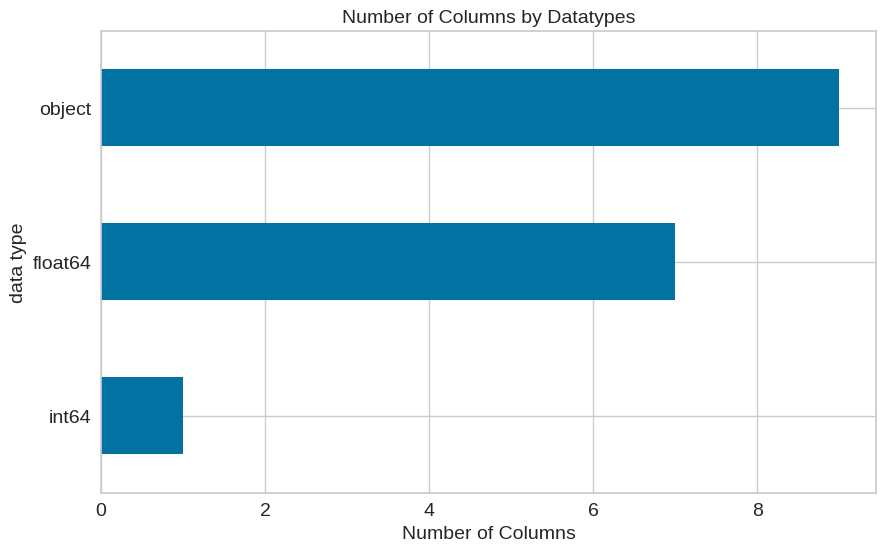

In [ ]:
#count of each type of column
df.dtypes.value_counts().sort_values().plot(kind='barh',figsize=(10,6),fontsize=14)
plt.title('Number of Columns by Datatypes',fontsize=14)
plt.xlabel('Number of Columns',fontsize=14)
plt.ylabel('data type',fontsize=14)

From above graph

Object datatype has 8 columns.

Float datatype has 7 columns.

Integer datatype has 1 column.


In [ ]:
# number of categories in each column
df.select_dtypes('object').apply(pd.Series.nunique,axis=0)

Invoice ID       1000
Branch              3
City                3
Customer type       2
Gender              2
Product line        6
Date               89
Time              506
Payment             3
dtype: int64

In [ ]:
#dealing with date and time
df['Date']=pd.to_datetime(df['Date'])

df['Day']=(df['Date']).dt.day
df['Month']=(df['Date']).dt.month

df['Month'] = df['Month'].apply(lambda x : calendar.month_name[x])

df['Time']= pd.to_datetime(df['Time'])

df['Hour'] =(df['Time']).dt.hour


In [ ]:
df   #converted date column into Day Month Hour

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Day,Month,Hour
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,2024-02-29 13:08:00,Ewallet,522.83,4.761905,26.1415,9.1,5,January,13
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,2024-02-29 10:29:00,Cash,76.40,4.761905,3.8200,9.6,8,March,10
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,2024-02-29 13:23:00,Credit card,324.31,4.761905,16.2155,7.4,3,March,13
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,2024-02-29 20:33:00,Ewallet,465.76,4.761905,23.2880,8.4,27,January,20
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,2024-02-29 10:37:00,Ewallet,604.17,4.761905,30.2085,5.3,8,February,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,2019-01-29,2024-02-29 13:46:00,Ewallet,40.35,4.761905,2.0175,6.2,29,January,13
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,2019-03-02,2024-02-29 17:16:00,Ewallet,973.80,4.761905,48.6900,4.4,2,March,17
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2019-02-09,2024-02-29 13:22:00,Cash,31.84,4.761905,1.5920,7.7,9,February,13
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2019-02-22,2024-02-29 15:33:00,Cash,65.82,4.761905,3.2910,4.1,22,February,15


In [ ]:
df.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating,Day,Hour
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905,15.379369,6.97270,15.256000,14.910000
std,26.494628,2.923431,11.708825,245.885335,234.17651,0.000000,11.708825,1.71858,8.693563,3.186857
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905,0.508500,4.00000,1.000000,10.000000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905,5.924875,5.50000,8.000000,12.000000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905,12.088000,7.00000,15.000000,15.000000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905,22.445250,8.50000,23.000000,18.000000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905,49.650000,10.00000,31.000000,20.000000


In [ ]:
df.mean()

Unit price                  55.672130
Quantity                     5.510000
Tax 5%                      15.379369
Total                      322.966749
cogs                       307.587380
gross margin percentage      4.761905
gross income                15.379369
Rating                       6.972700
Day                         15.256000
Hour                        14.910000
dtype: float64

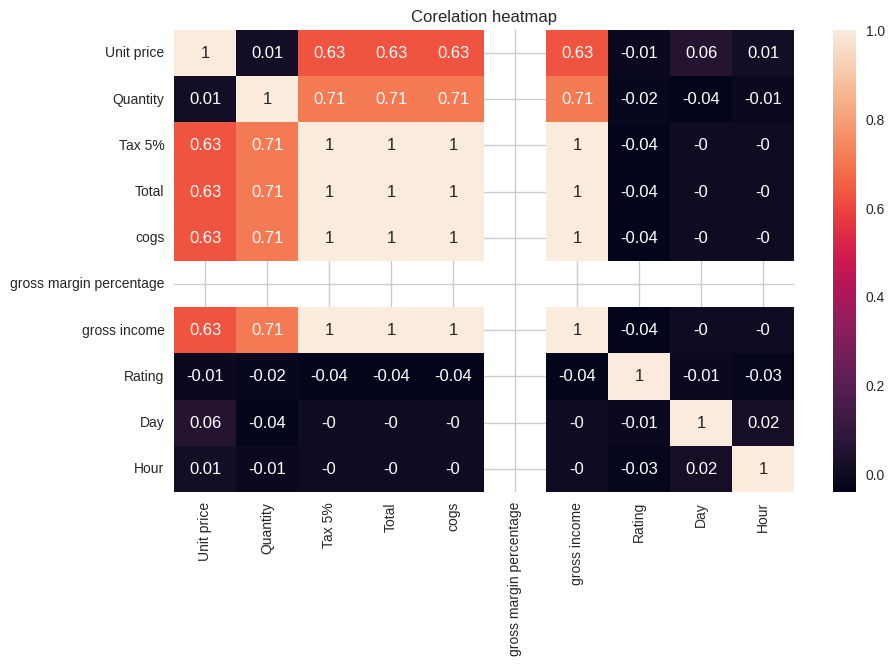

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(round(df.corr(),2), annot=True).set_title("Corelation heatmap")
plt.show()

**Observation**: unit price is positively correlated to cogs with 63% correlation. Another interesting observation is that ‘Ratings’ hardly has any correlation with any other variables.As is obvious, Quantity and gross income has very high correlation of 70%.¶

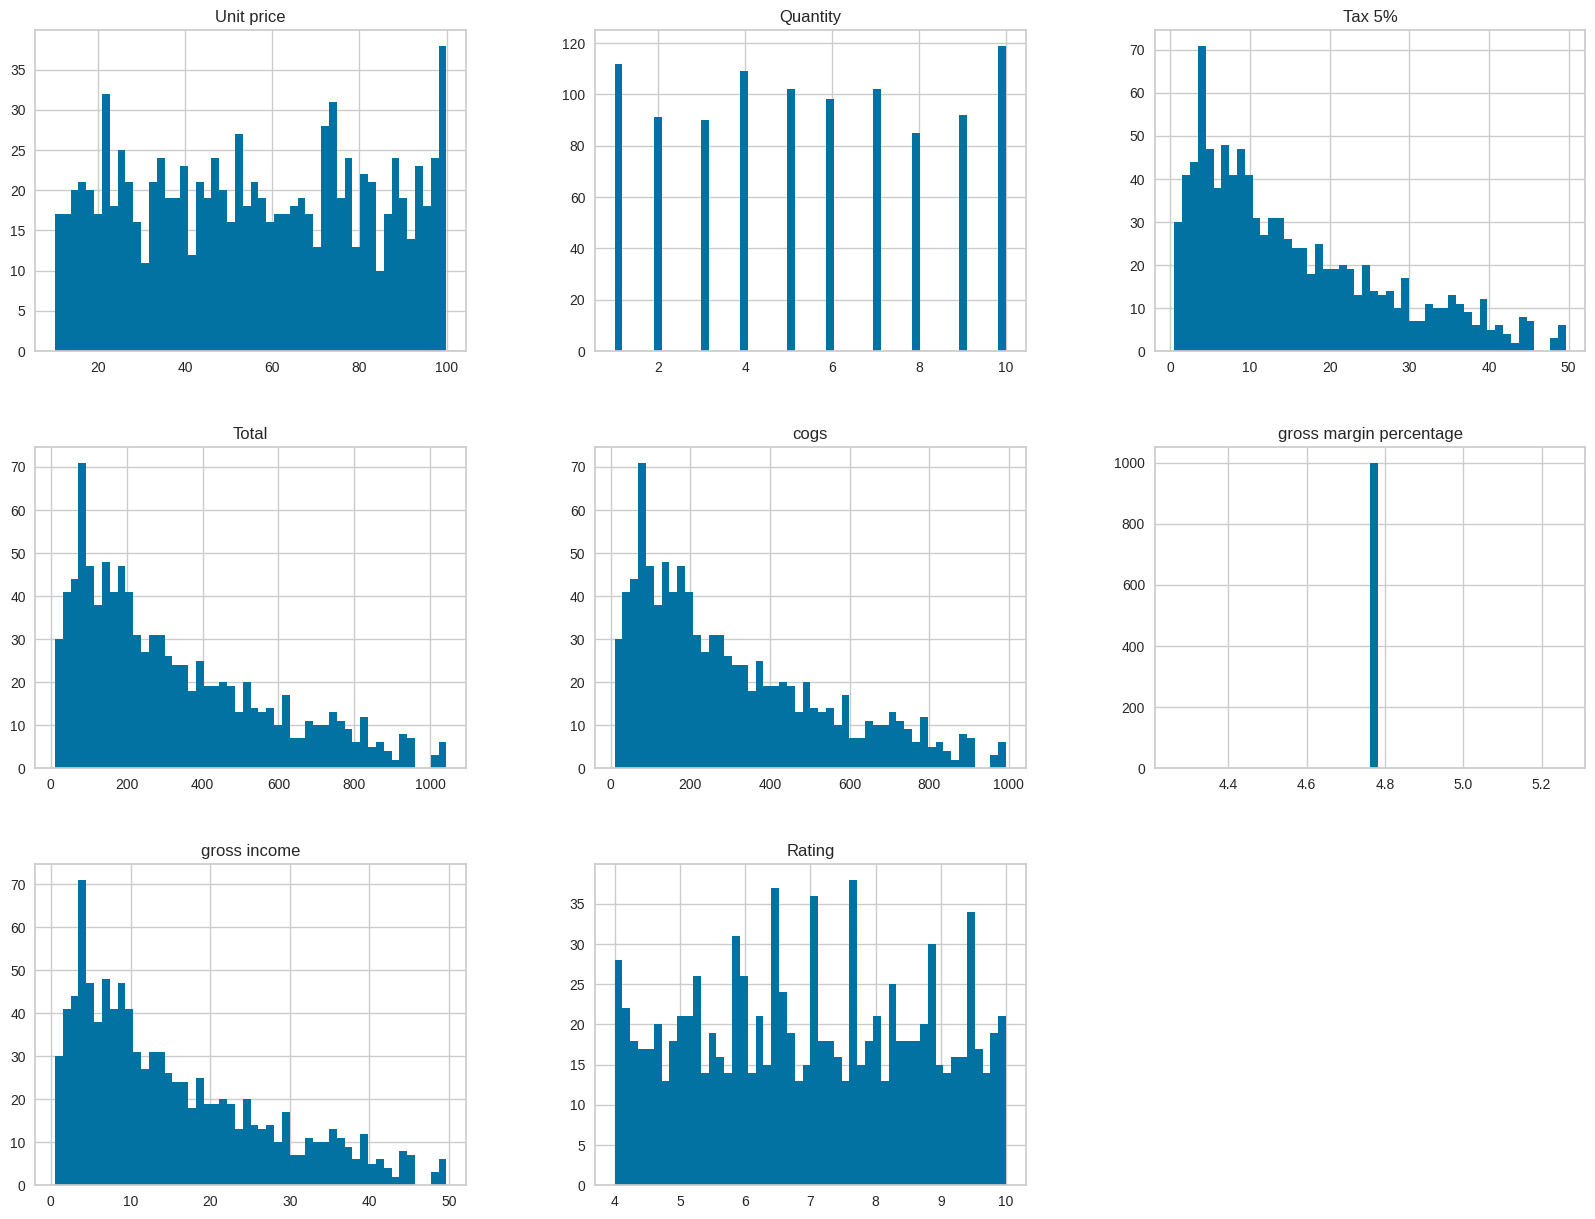

In [ ]:
#histogram for some features

features = ["Unit price","Quantity","Tax 5%","Total","cogs","gross margin percentage","gross income","Rating"]
df[features].hist(bins=50, figsize=(20,15))
plt.show()

In [ ]:
# making function for value count

def vcounts(df,colname):
    a = df[colname].value_counts()
    return a

In [ ]:
vcounts(df,'Branch')

A    340
B    332
C    328
Name: Branch, dtype: int64

In [ ]:
vcounts(df,'City')

Yangon       340
Mandalay     332
Naypyitaw    328
Name: City, dtype: int64

In [ ]:
vcounts(df,'Customer type')

Member    501
Normal    499
Name: Customer type, dtype: int64

In [ ]:
vcounts(df,'Gender')   # Feamle are leading

Female    501
Male      499
Name: Gender, dtype: int64

In [ ]:
vcounts(df,'Product line')   # Fashion accessories are sold at most

Fashion accessories       178
Food and beverages        174
Electronic accessories    170
Sports and travel         166
Home and lifestyle        160
Health and beauty         152
Name: Product line, dtype: int64

In [ ]:
vcounts(df,'Payment')  # Payment Ewallet is preferred by most of the customer

Ewallet        345
Cash           344
Credit card    311
Name: Payment, dtype: int64

**Query: Is there any difference in aggregate sales across branches?**

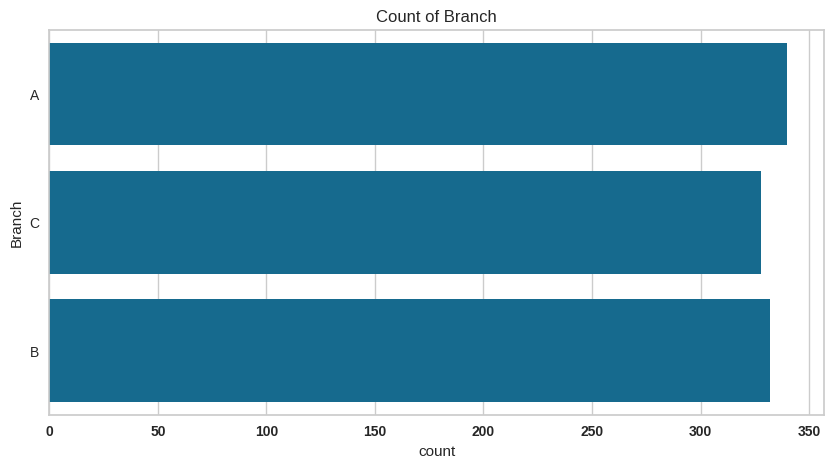

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(df.Branch).set_title('Count of Branch')
plt.xticks(fontsize=10,fontweight='bold')
plt.show()

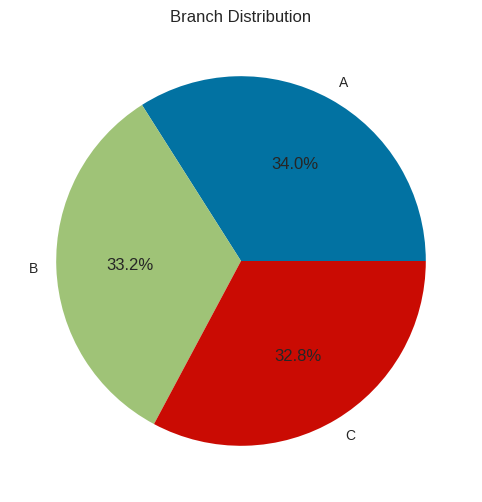

In [ ]:
plt.figure(figsize = (12,6))
branch = df.Branch.value_counts().reset_index()
plt.pie(branch.Branch, labels = branch['index'],autopct='%1.1f%%')
plt.title("Branch Distribution")
plt.show()

**Observation**:
From above Pie diagram of branch distribution it is clearly observed that the supermarket has maximum number of branch A as compared to B and C.

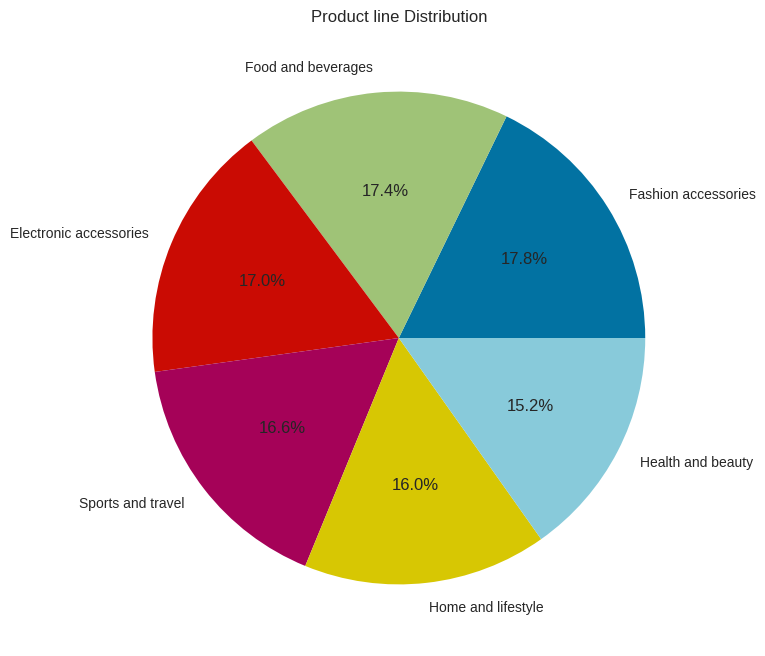

In [ ]:
#Productline Distribution

plt.figure(figsize=(12,8))
productline = df['Product line'].value_counts().reset_index()   # if i don't write reset index then getting error
plt.pie(productline['Product line'], labels=productline['index'], autopct='%1.1f%%')
plt.title('Product line Distribution')
plt.show()

**Observations:**
From above Pie chart it is cleared that

Fashion accessories are most popular product.

Food beverages is second popular product.

Electronics accessories are third popular product.

<Axes: xlabel='Branch,Gender'>

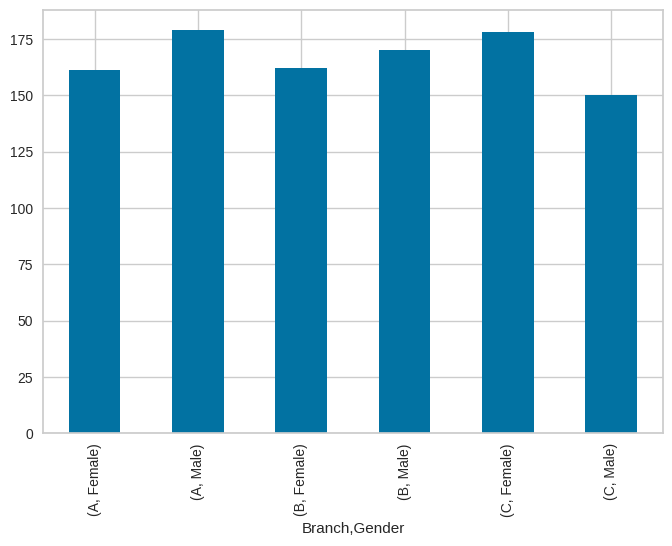

In [ ]:
#Distribution of Gender across branches
df.groupby(['Branch','Gender']).size().plot.bar()

**Observation:**
In Female count branch C popular whereas in male Branch A and then branch B is popular.

Text(0.5, 1.0, 'Ratings by branch')

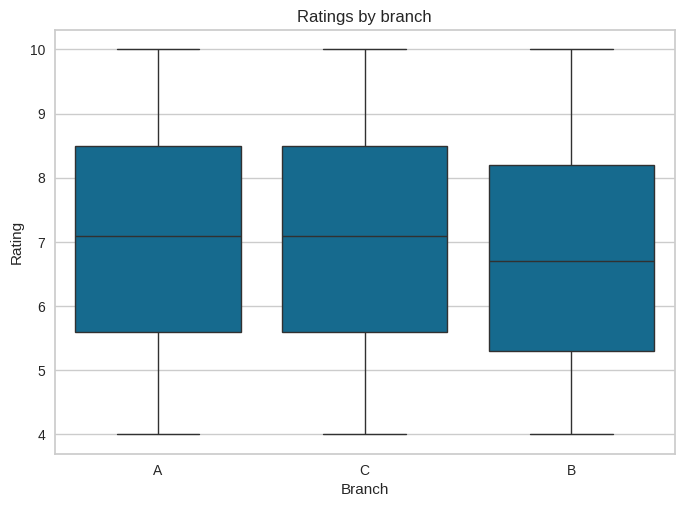

In [ ]:
#Rating of the branch
sns.boxplot(x='Branch',y='Rating',data=df).set_title('Ratings by branch')

**Observations:**

According to the boxplot Branch B has lowest Ratings and Branch A and C has equal ratings.

<Axes: xlabel='Branch,Customer type'>

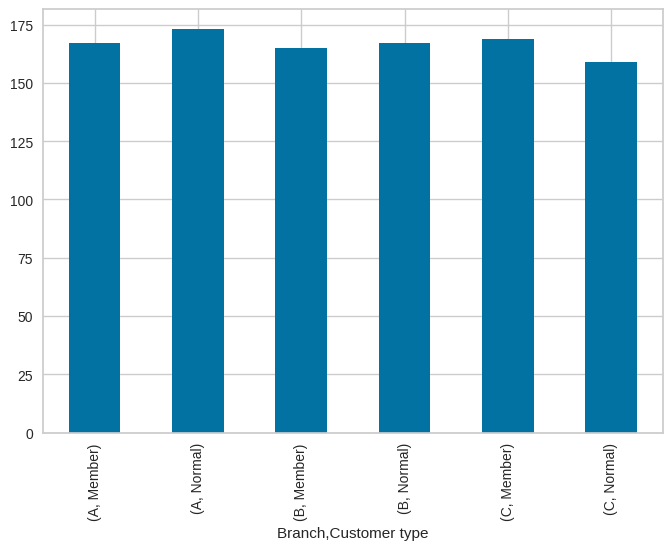

In [ ]:
# Distribution of customer type across branches
df.groupby(['Branch','Customer type']).size().plot.bar()

<Axes: xlabel='Customer type'>

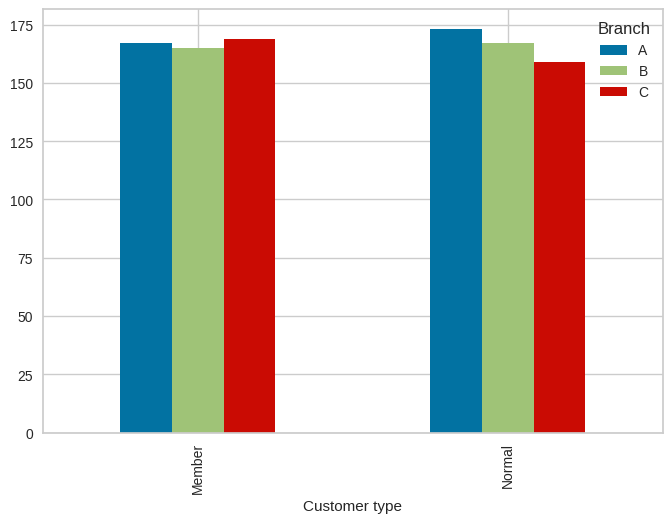

In [ ]:
# Distribution of customer type across branches
df.groupby(['Branch','Customer type']).size().unstack(0).plot.bar()  #better to understand

**Observations:**

Normal customer buys from Branch A widely and then from Branch B

Member customer buys from Branch C and Branch A

**Query: Which product line has more sale ?**

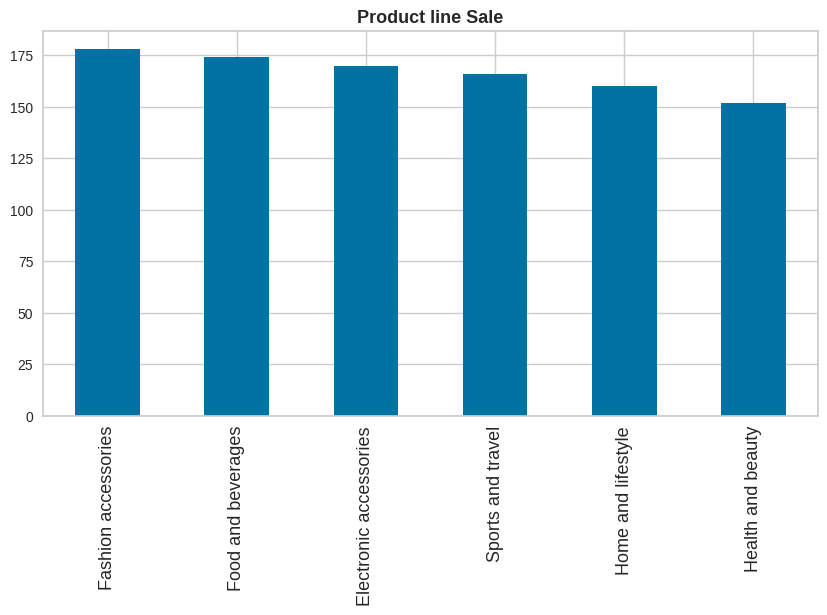

In [ ]:
plt.figure(figsize=(10,5))
df['Product line'].value_counts().plot.bar().set_title("Product line Sale",fontsize=13,fontweight='bold')
plt.xticks(fontsize=13)
plt.show()

In [ ]:
df.groupby('Product line')['Product line'].count()

Product line
Electronic accessories    170
Fashion accessories       178
Food and beverages        174
Health and beauty         152
Home and lifestyle        160
Sports and travel         166
Name: Product line, dtype: int64

<Axes: xlabel='count', ylabel='Product line'>

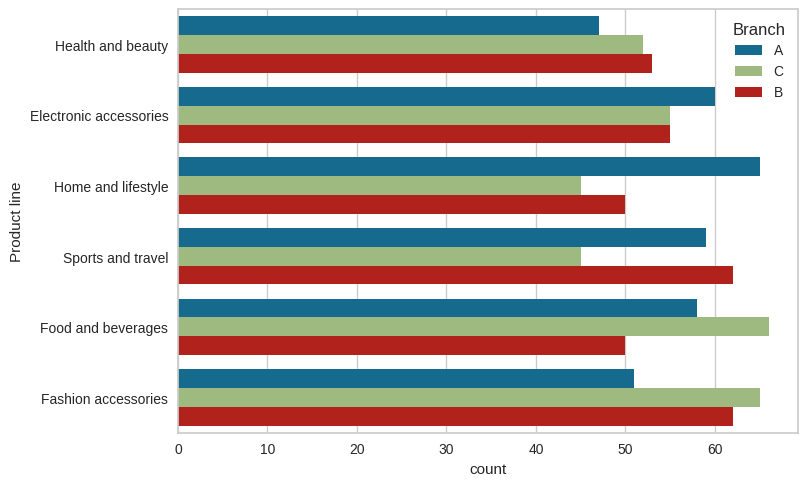

In [ ]:
# sales of different product lines in different branches

sns.countplot(y='Product line',hue='Branch',data=df)


**Observations**:

In Branch A : Home and lifestyle items are sold the most.

In Branch B: Sports and travel and Fashion accessories are mostly sold the most.

In Branch C: Food Beverages and Fashion accessories are maximum sold.

**Query: Product sales on the basis of gender**

In [ ]:
df.groupby('Product line')['Gender'].value_counts()

Product line            Gender
Electronic accessories  Male      86
                        Female    84
Fashion accessories     Female    96
                        Male      82
Food and beverages      Female    90
                        Male      84
Health and beauty       Male      88
                        Female    64
Home and lifestyle      Male      81
                        Female    79
Sports and travel       Female    88
                        Male      78
Name: Gender, dtype: int64

**Query: Which product line generates most income?**

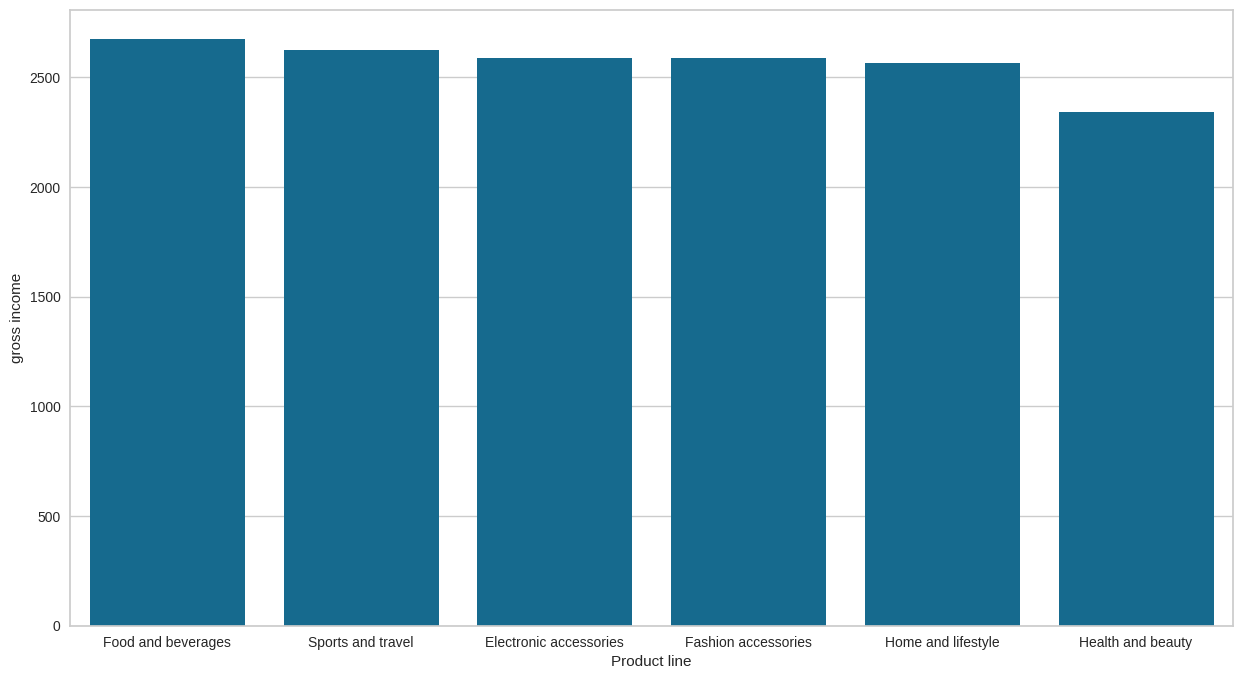

In [ ]:
cat=df[["Product line", "gross income"]].groupby(['Product line'], as_index=False).sum()
cat_sort=cat.sort_values(by='gross income', ascending=False)
plt.figure(figsize=(15,8))
sns.barplot(x='Product line', y='gross income', data=cat_sort)
plt.show()

In [ ]:
df.groupby('Product line')['gross income'].sum()

Product line
Electronic accessories    2587.5015
Fashion accessories       2585.9950
Food and beverages        2673.5640
Health and beauty         2342.5590
Home and lifestyle        2564.8530
Sports and travel         2624.8965
Name: gross income, dtype: float64

**Observations:**
Gross income is highest in Food and beverages.

<Axes: xlabel='Total', ylabel='Product line'>

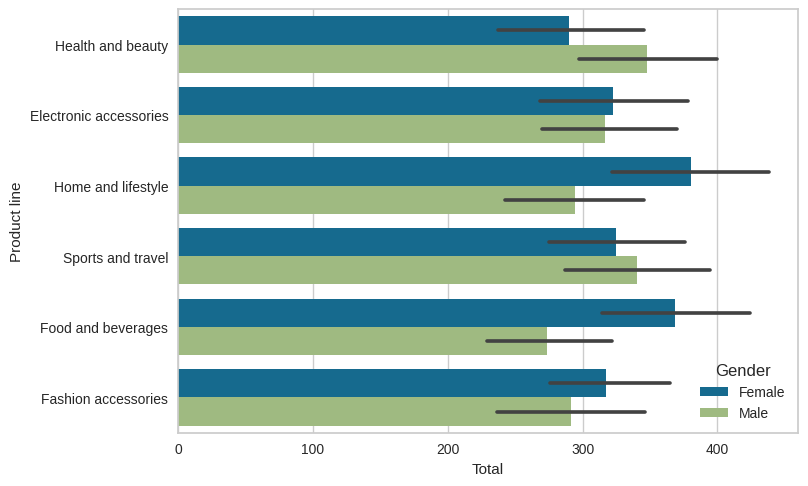

In [ ]:
#Sales of products segregated by Gender

sns.barplot(x='Total',hue='Gender',y = 'Product line',data=df)

**Observations**

Female customers buys most of the product from Home and liftstyle department.

Male customers buys most of the product from Health and beauty.

<Axes: xlabel='Quantity', ylabel='Product line'>

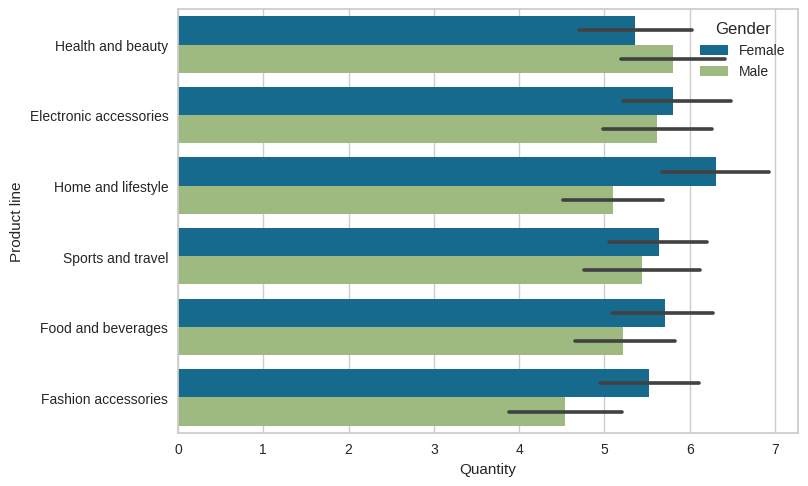

In [ ]:
sns.barplot(x='Quantity',hue='Gender',y='Product line',data=df)

**Observations**

According to the graph Male buys Health and Beauty product and quantity ranging from 5 to 7.

Female inclined to buy Home nad Lifestyle product and quantity ranging from 6 to 7

<Axes: xlabel='Unit price', ylabel='Product line'>

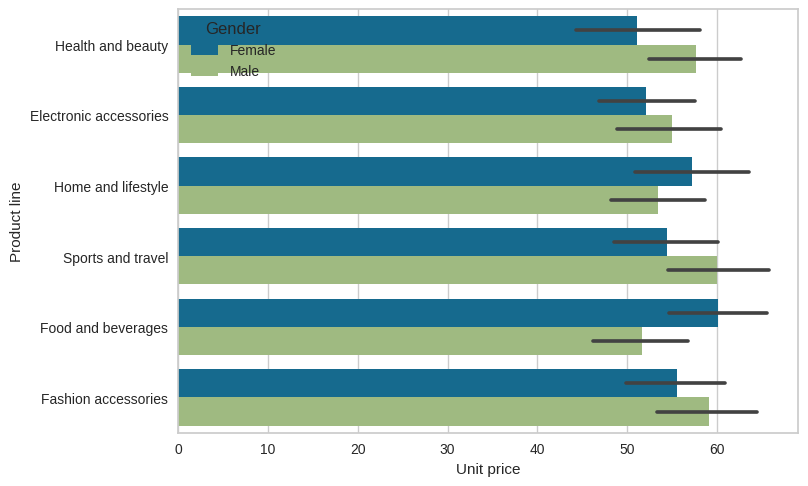

In [ ]:
#price of the product
sns.barplot(x='Unit price',hue='Gender',y='Product line',data=df)

**Observations**

Male don't compromise on Unit price when the product is from Sports and Travel department.

Female don't compromised on Unit price from Food and beverages department.

<Axes: xlabel='Total', ylabel='Product line'>

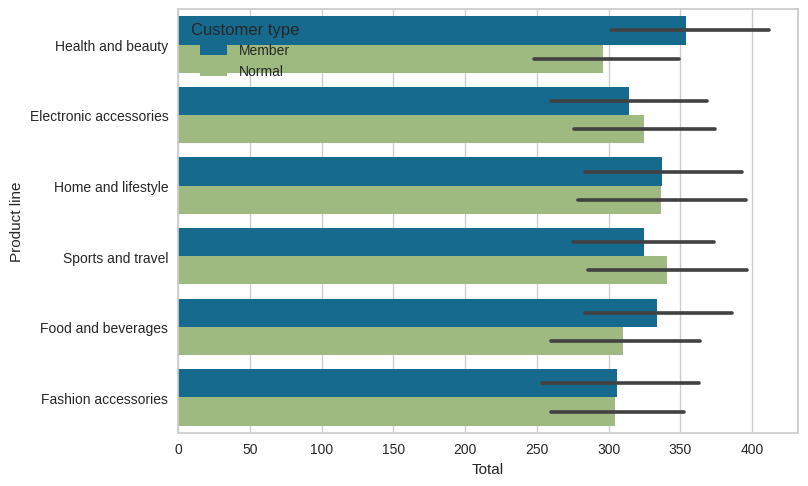

In [ ]:
#sales of product
sns.barplot(x='Total',hue='Customer type',y='Product line',data=df)

<Axes: xlabel='Quantity', ylabel='Product line'>

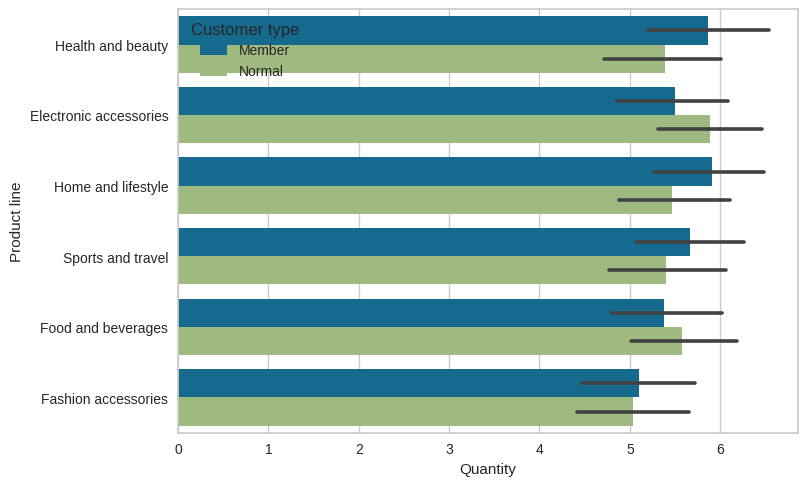

In [ ]:
#Quantity of product
sns.barplot(x='Quantity',hue='Customer type',y='Product line',data=df)

**Observations**

Members buys most product from Health and Beauty
and Home and Lifestyle.

Normal customer buys Electronics accessories most.

<Axes: xlabel='Unit price', ylabel='Product line'>

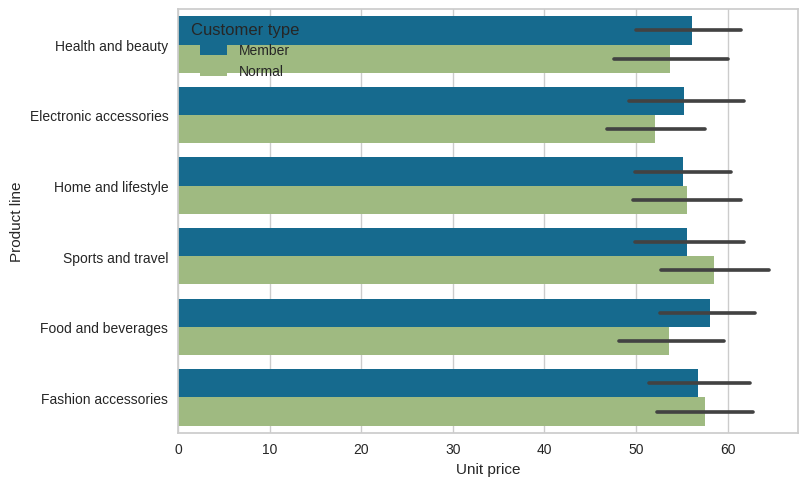

In [ ]:
#Price of products segregated by Customer type
sns.barplot(x='Unit price',hue='Customer type',y = 'Product line',data=df)

<Axes: xlabel='Total', ylabel='Product line'>

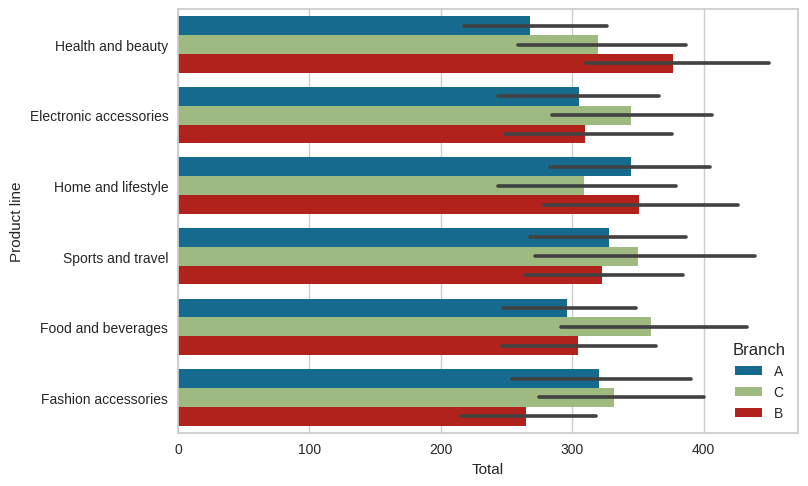

In [ ]:
#Total sales of products per branch
sns.barplot(x='Total',hue='Branch',y = 'Product line',data=df)

<Axes: xlabel='Total', ylabel='Product line'>

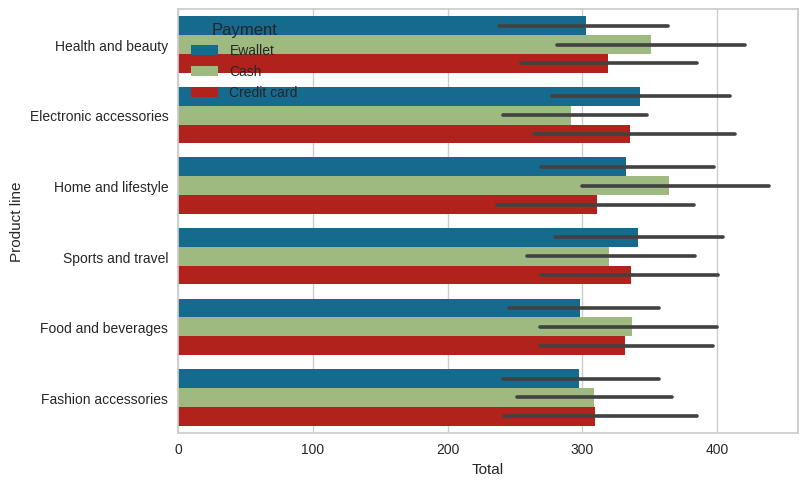

In [ ]:
#Total sales of products for each payment type
sns.barplot(x='Total',hue='Payment',y = 'Product line',data=df)

**Query: Which is the most pouplar payment method used by customers?**

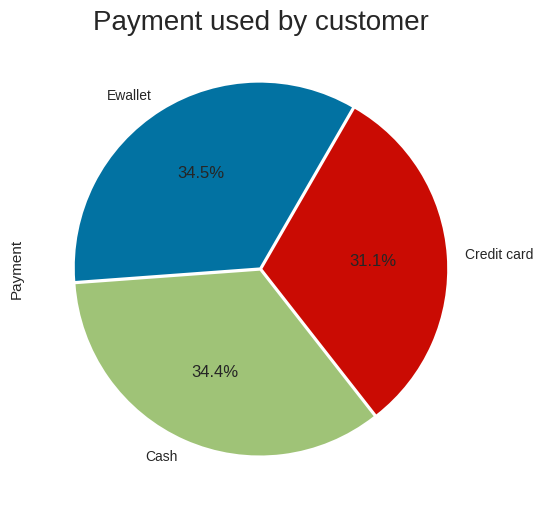

In [ ]:
plt.figure(figsize=(6,6))
df['Payment'].value_counts().plot.pie(explode=[0.01,0.01,0.01],autopct='%1.1f%%',startangle=60)
plt.title('Payment used by customer',fontsize=20)
plt.show()

**Observations:**
The most popular payment method is EWallet.

**Query: which payment type most used in every city**

In [ ]:
most_payment_type_in_cities = df.groupby("City")["Payment"].count()
most_payment_type_in_cities

City
Mandalay     332
Naypyitaw    328
Yangon       340
Name: Payment, dtype: int64

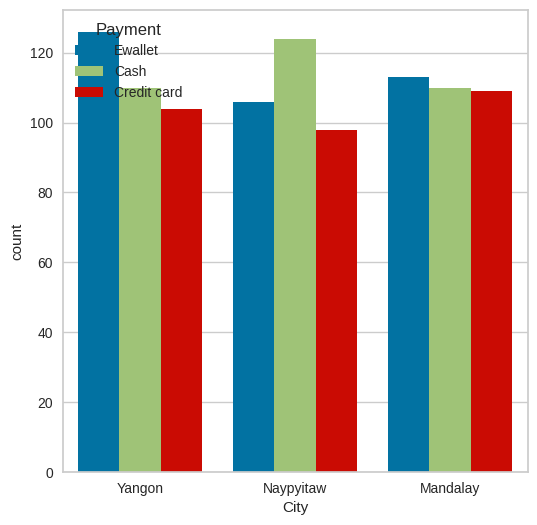

In [ ]:
plt.figure(figsize=(6,6))
sns.countplot(data=df,x="City",hue="Payment",saturation=True);

**Observation:**
Ewallet in Yangon & cash in Naypyitaw & Ewallet in Mandalay

<Axes: xlabel='Gender', ylabel='Total'>

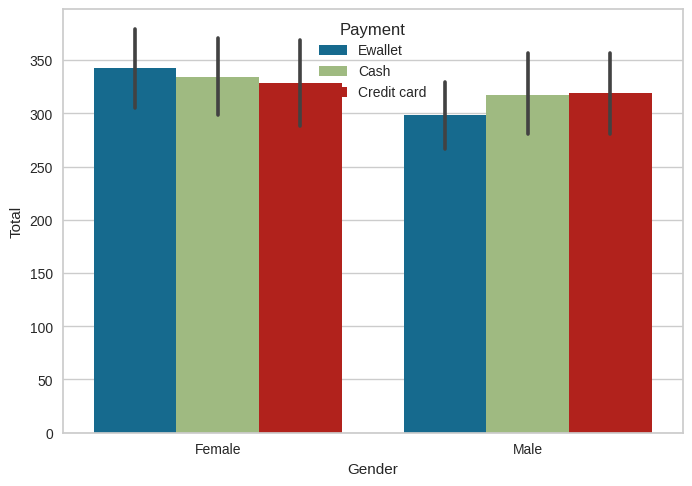

In [ ]:
#Sales generated by Gender through payment types
sns.barplot(y='Total',hue='Payment',x = 'Gender',data=df)

<Axes: xlabel='Customer type', ylabel='Total'>

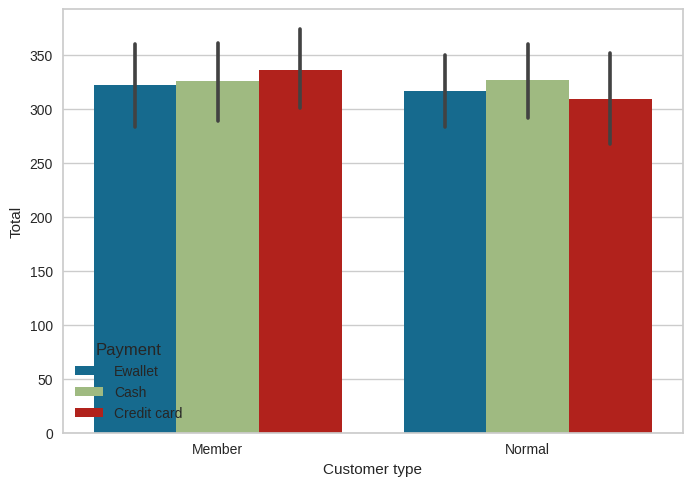

In [ ]:
#Sales generated by Customer Type through payment types

sns.barplot(y='Total',hue='Payment',x = 'Customer type',data=df)

Let us play with Date time Hour Month feature

Text(0.5, 1.0, 'Hourly sales')

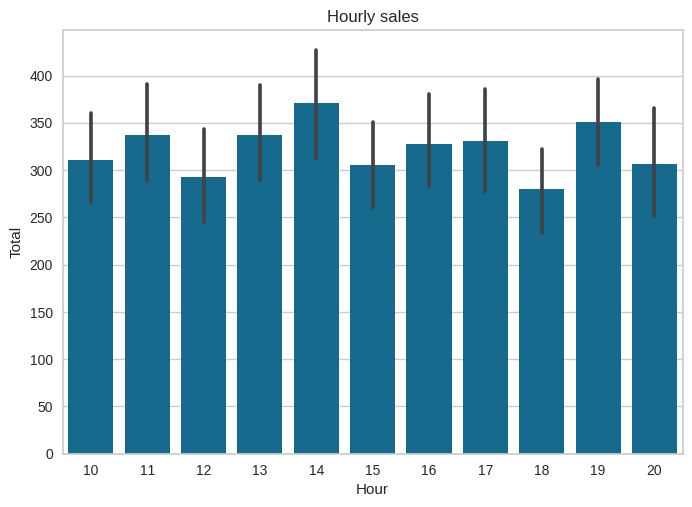

In [ ]:
#Hourly sales
sns.barplot(x='Hour',y='Total',data=df).set_title('Hourly sales')

At 2:00 o'clock maximum sale is gearated

Text(0.5, 1.0, 'Hourly Quantity')

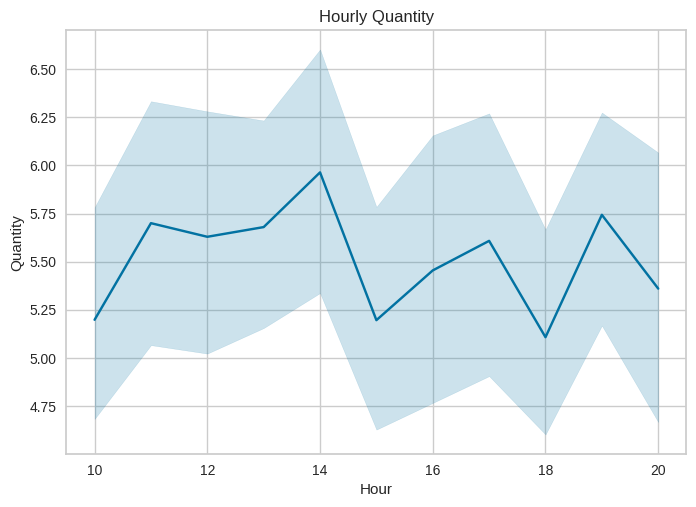

In [ ]:
#Hourly Quantity
sns.lineplot(x='Hour',y='Quantity',data=df).set_title('Hourly Quantity')

Text(0.5, 1.0, 'Daily Sales')

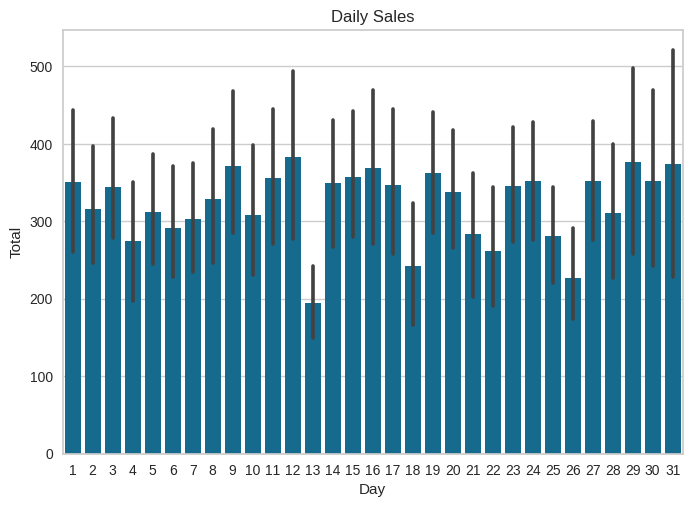

In [ ]:
#Daily Sales
sns.barplot(x='Day',y='Total',data=df).set_title('Daily Sales')

Text(0.5, 1.0, 'Daily Quantity')

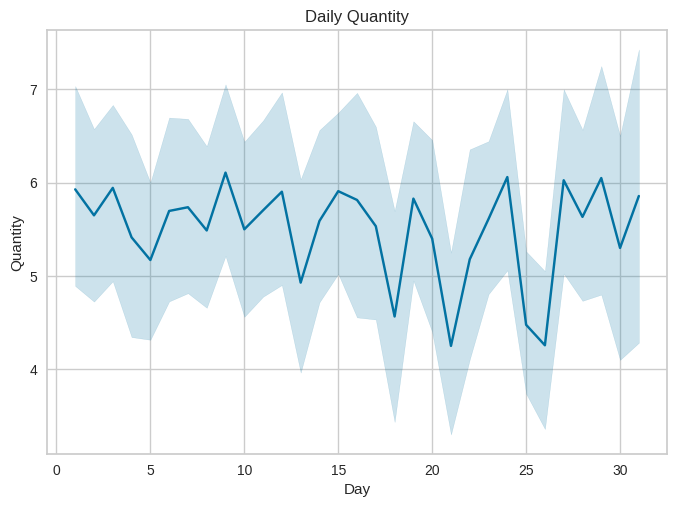

In [ ]:
#Daily Quantity
sns.lineplot(x='Day',y='Quantity',data=df).set_title('Daily Quantity')

Text(0.5, 1.0, 'Monthly sales')

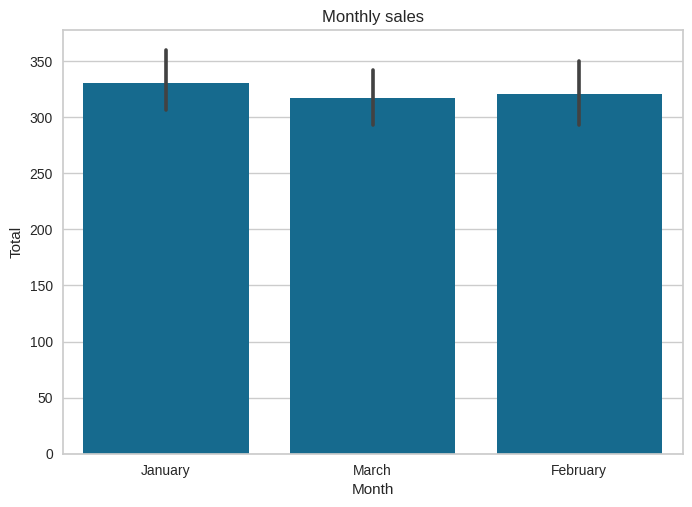

In [ ]:
#Monthly sales
sns.barplot(x='Month',y='Total',data=df).set_title('Monthly sales')

Text(0.5, 1.0, 'Monthly Quantity')

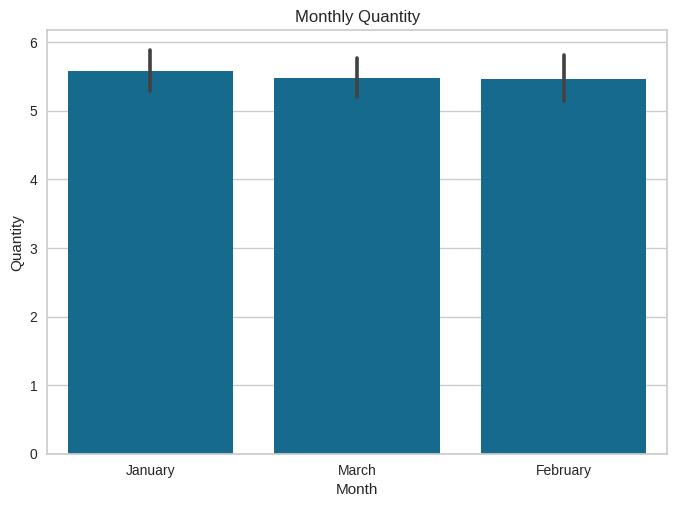

In [ ]:
#Monthly Quantity
sns.barplot(x="Month",  y = 'Quantity',data =df).set_title("Monthly Quantity")

**Observations:**

Maximum sales are generated in the month of January with a big drop in March and slight increase in February